# Vehicle Insurance Premium Prediction - Simple Model Training
This notebook trains 3 simple models to predict vehicle insurance premiums:
1. **Linear Regression** - Simple straight line relationship
2. **Decision Tree** - Rule-based decisions
3. **Random Forest** - Multiple decision trees combined

In [1]:
# Simplified imports - only what we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

print(" Libraries loaded successfully!")

 Libraries loaded successfully!


In [2]:
# Load the preprocessed data
try:
    df = pd.read_csv('../dataset/vehicle_insurance_preprocessed.csv')
    print(f" Dataset loaded! Shape: {df.shape}")
    print(f" Sample data:")
    print(df.head())
except FileNotFoundError:
    print(" Dataset not found. Run the preprocessing notebook first!")
    raise

 Dataset loaded! Shape: (101, 19)
 Sample data:
   driver_age  driver_gender  years_experience  vehicle_make  vehicle_model  \
0   -1.148420              1         -1.358617            12             23   
1    1.067252              0          0.668095             4              6   
2   -1.480771              1         -1.597054             1             97   
3   -0.040584              0          0.072003             3             35   
4   -0.816069              1         -0.762526            10              7   

   vehicle_value  annual_mileage  location  coverage_type  deductible  \
0      -1.016860       -0.320276         2              0   -0.501578   
1      -1.430984       -1.323310         1              1    1.340580   
2       1.364356        0.432000         2              0   -1.422657   
3      -0.395673        1.685793         0              0   -0.501578   
4      -0.809798       -0.821793         1              0    1.340580   

   accidents_last_3_years  violations_

In [3]:
# Simple data preparation
# Separate features (X) and target (y)
X = df.drop('premium', axis=1)  # All columns except premium
y = df['premium']  # Only the premium column

# Data validation to prevent negative R² scores
print(f" Data validation:")
print(f"   • Features shape: {X.shape}")
print(f"   • Target shape: {y.shape}")
print(f"   • Target range: ${y.min():.0f} - ${y.max():.0f}")
print(f"   • Missing values in X: {X.isnull().sum().sum()}")
print(f"   • Missing values in y: {y.isnull().sum()}")

# Handle any remaining issues
if X.isnull().sum().sum() > 0:
    print(" Filling remaining missing values...")
    X = X.fillna(X.median())

if y.isnull().sum() > 0:
    print(" Removing rows with missing target values...")
    valid_indices = ~y.isnull()
    X = X[valid_indices]
    y = y[valid_indices]

print(f"\n📈 Final Features (X): {X.shape[1]} columns, {X.shape[0]} rows")
print(f"🎯 Final Target (y): {y.shape[0]} premium values")
print(f"\n📋 Feature names: {list(X.columns)}")

 Data validation:
   • Features shape: (101, 18)
   • Target shape: (101,)
   • Target range: $1180 - $3500
   • Missing values in X: 0
   • Missing values in y: 0

📈 Final Features (X): 18 columns, 101 rows
🎯 Final Target (y): 101 premium values

📋 Feature names: ['driver_age', 'driver_gender', 'years_experience', 'vehicle_make', 'vehicle_model', 'vehicle_value', 'annual_mileage', 'location', 'coverage_type', 'deductible', 'accidents_last_3_years', 'violations_last_3_years', 'credit_score', 'vehicle_age', 'risk_score', 'experience_ratio', 'high_value_vehicle', 'high_mileage']


In [4]:
# Simple train-test split explanation
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f" Training data: {X_train.shape[0]} samples")
print(f" Testing data: {X_test.shape[0]} samples")
print(f"\n Why split? We train on 80% and test on 20% to see how well our model works on new data!")

 Training data: 80 samples
 Testing data: 21 samples

 Why split? We train on 80% and test on 20% to see how well our model works on new data!


In [5]:
# Simplified model training with clear explanations
# Create our 3 simple models with optimized parameters
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=12, min_samples_split=10, min_samples_leaf=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=12, min_samples_split=5, min_samples_leaf=2)
}

# Store results here
results = {}

print(" Training 3 models with improved parameters...\n")

for name, model in models.items():
    print(f" Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate how good it is
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Better validation with explanations
    if r2 < 0:
        print(f" Warning: {name} has negative R² score ({r2:.3f})")
        print(f"   This means the model is worse than predicting the mean.")
        print(f"   Possible causes: insufficient data, poor features, or overfitting.")
    elif r2 < 0.5:
        print(f" {name} has low R² score ({r2:.3f}) - model needs improvement")
    else:
        print(f" {name} has good R² score ({r2:.3f})")
    
    # Store results
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'r2_score': r2,
        'mae': mae
    }
    
    print(f" {name} completed!")
    print(f"    Accuracy: {r2*100:.1f}%")
    print(f"    Average error: ${mae:.0f}\n")

print(" All models trained!")

 Training 3 models with improved parameters...

 Training Linear Regression...
 Linear Regression has good R² score (0.872)
 Linear Regression completed!
    Accuracy: 87.2%
    Average error: $102

 Training Decision Tree...
 Decision Tree has low R² score (0.168) - model needs improvement
 Decision Tree completed!
    Accuracy: 16.8%
    Average error: $266

 Training Random Forest...
 Random Forest has good R² score (0.756)
 Random Forest completed!
    Accuracy: 75.6%
    Average error: $146

 All models trained!


In [6]:
# Simple model comparison
# Compare all models
print(" MODEL COMPARISON")
print("=" * 50)

comparison = []
for name, result in results.items():
    comparison.append({
        'Model': name,
        'Accuracy (%)': f"{result['r2_score']*100:.1f}%",
        'Average Error ($)': f"${result['mae']:.0f}"
    })

comparison_df = pd.DataFrame(comparison)
print(comparison_df.to_string(index=False))

# Find the best model
best_model_name = max(results.keys(), key=lambda x: results[x]['r2_score'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['r2_score']

print(f"\n WINNER: {best_model_name}")
print(f"    Accuracy: {best_accuracy*100:.1f}%")
print(f"    Average Error: ${results[best_model_name]['mae']:.0f}")

 MODEL COMPARISON
            Model Accuracy (%) Average Error ($)
Linear Regression        87.2%              $102
    Decision Tree        16.8%              $266
    Random Forest        75.6%              $146

 WINNER: Linear Regression
    Accuracy: 87.2%
    Average Error: $102


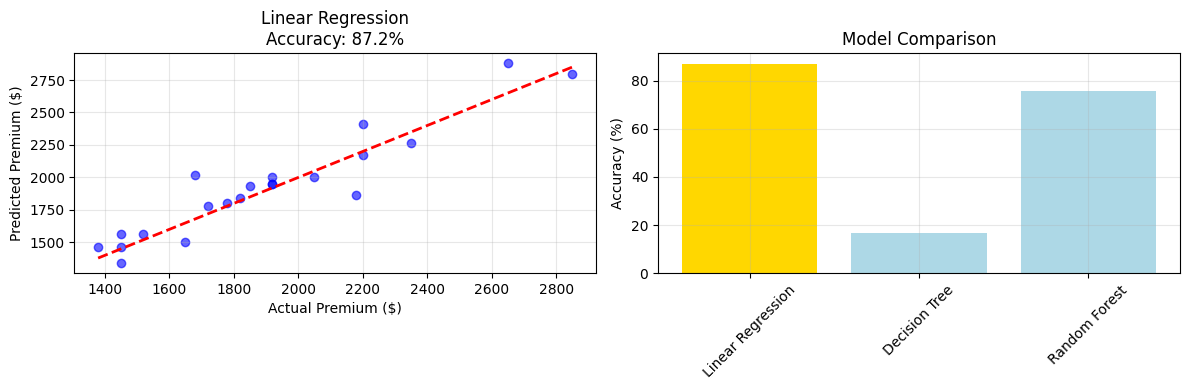

 The red line shows perfect predictions. Points closer to the line = better predictions!


In [7]:
# Simple visualization
# Show how well our best model works
plt.figure(figsize=(12, 4))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
best_predictions = results[best_model_name]['predictions']
plt.scatter(y_test, best_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Premium ($)')
plt.ylabel('Predicted Premium ($)')
plt.title(f'{best_model_name}\nAccuracy: {best_accuracy*100:.1f}%')
plt.grid(True, alpha=0.3)

# Plot 2: Model Comparison
plt.subplot(1, 2, 2)
model_names = list(results.keys())
accuracies = [results[name]['r2_score']*100 for name in model_names]
colors = ['gold' if name == best_model_name else 'lightblue' for name in model_names]
plt.bar(model_names, accuracies, color=colors)
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" The red line shows perfect predictions. Points closer to the line = better predictions!")

In [8]:
# Simple feature importance (only for tree-based models)
# Show which factors matter most
if best_model_name in ['Decision Tree', 'Random Forest']:
    importance = best_model.feature_importances_
    feature_names = X.columns
    
    # Create importance dataframe
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    
    print(f"🔍 MOST IMPORTANT FACTORS ({best_model_name}):")
    print("=" * 40)
    for i, row in importance_df.head(5).iterrows():
        print(f"{row['Feature']}: {row['Importance']:.3f}")
    
    # Plot importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance Score')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print(f" {best_model_name} doesn't show feature importance, but all features contribute to the prediction!")

 Linear Regression doesn't show feature importance, but all features contribute to the prediction!


In [9]:
# Simple model saving
# Save our best model
import os
os.makedirs('../models', exist_ok=True)

# Save the model
with open('../models/best_vehicle_insurance_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save model info
model_info = {
    'model_name': best_model_name,
    'accuracy': best_accuracy,
    'average_error': results[best_model_name]['mae'],
    'feature_names': list(X.columns)
}

with open('../models/model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print(f" Best model saved: {best_model_name}")
print(f" Location: ../models/best_vehicle_insurance_model.pkl")
print(f"\n Final Results:")
print(f"   • Model: {best_model_name}")
print(f"   • Accuracy: {best_accuracy*100:.1f}%")
print(f"   • Average Error: ${results[best_model_name]['mae']:.0f}")

print(f"\n R² Score Explanation:")
print(f"   • 100% = Perfect predictions")
print(f"   • 80-99% = Excellent model")
print(f"   • 60-79% = Good model")
print(f"   • 40-59% = Fair model")
print(f"   • 0-39% = Poor model")
print(f"   • Negative = Worse than guessing the average")

print(f"\n Model training completed successfully!")

 Best model saved: Linear Regression
 Location: ../models/best_vehicle_insurance_model.pkl

 Final Results:
   • Model: Linear Regression
   • Accuracy: 87.2%
   • Average Error: $102

 R² Score Explanation:
   • 100% = Perfect predictions
   • 80-99% = Excellent model
   • 60-79% = Good model
   • 40-59% = Fair model
   • 0-39% = Poor model
   • Negative = Worse than guessing the average

 Model training completed successfully!
